<a href="https://colab.research.google.com/github/mohit579-pixel/SL-3/blob/main/ass1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df=pd.read_csv('/content/drive/MyDrive/SL-3/Ass4/HousingData.csv')

In [48]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


<Axes: >

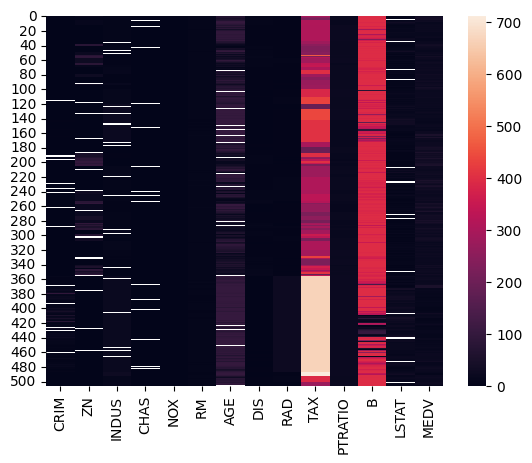

In [49]:
sns.heatmap(df)

<Axes: >

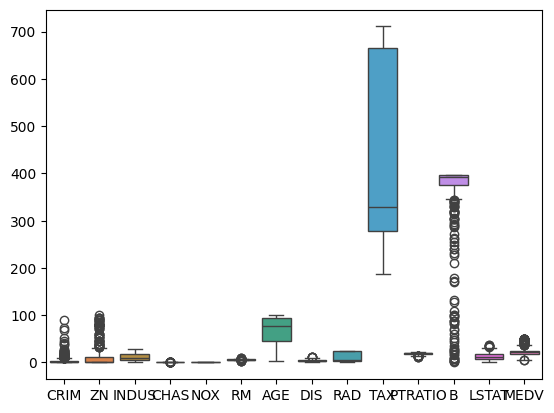

In [50]:
sns.boxplot(df)

In [51]:
df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [52]:
for col in df.columns:
  df[col].fillna(value=df[col].mean(),inplace=True)

In [53]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

<Axes: >

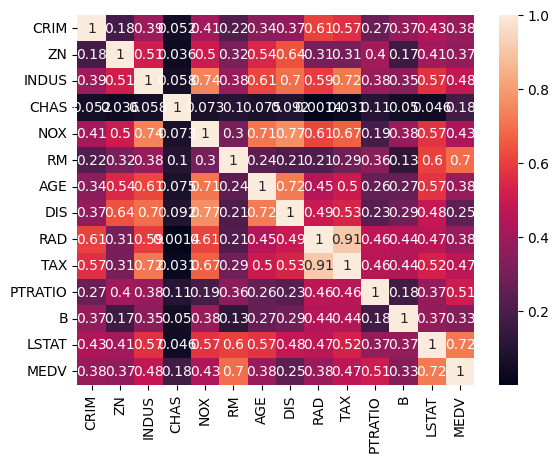

In [54]:
sns.heatmap(df.corr().abs(),annot=True)

<Axes: xlabel='RM', ylabel='Count'>

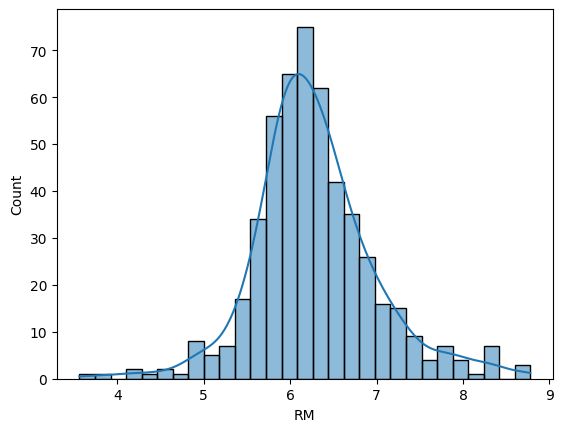

In [55]:
sns.histplot(x='RM',data=df,kde=True)

<Axes: >

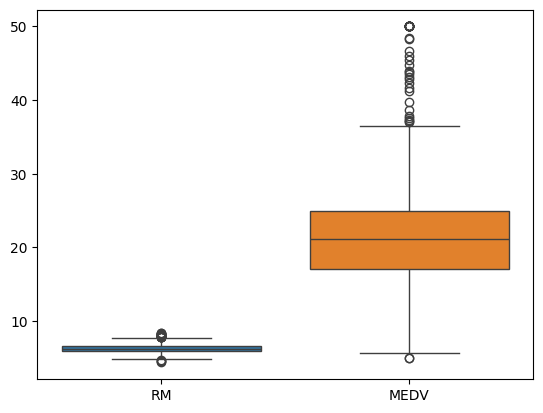

In [56]:
z_scores = np.abs((df['RM'] - df['RM'].mean()) / df['RM'].std())


threshold = 3


df_no_outliers = df[z_scores < threshold]

X = df_no_outliers['RM'].values.reshape(-1, 1)
y = df_no_outliers['MEDV'].values.reshape(-1, 1)
data = pd.DataFrame({'RM': X.flatten(), 'MEDV': y.flatten()})
sns.boxplot(data)

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [58]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression()
linear.fit(X_train,y_train)

LinearRegression()

In [59]:
y_pred=linear.predict(X_test)
y_pred

array([[16.53574569],
       [22.15486147],
       [42.59867052],
       [25.09634642],
       [24.46114203],
       [23.91388902],
       [21.24603057],
       [31.96632624],
       [23.97252327],
       [19.79971903],
       [21.3926162 ],
       [31.5461141 ],
       [16.46733907],
       [31.27248759],
       [27.39285461],
       [ 5.28774176],
       [23.43504263],
       [16.95595783],
       [24.1972879 ],
       [13.79948062],
       [18.97883951],
       [25.91722595],
       [20.02448366],
       [20.39583392],
       [27.20717948],
       [21.82260071],
       [26.10290108],
       [14.03401763],
       [21.12876207],
       [15.79304517],
       [23.83571002],
       [22.48712223],
       [21.46102283],
       [31.34089422],
       [20.12220742],
       [18.52931025],
       [13.34995136],
       [31.04772296],
       [24.24614978],
       [28.17464463],
       [38.08383315],
       [23.0930095 ],
       [16.83868933],
       [20.86490794],
       [25.37974531],
       [19

In [60]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)*100
print(score)

56.38892136896481
